# Data Prep
This notebook summarizes the steps that went into processing the raw data into the train and test data that was used for the competition.

In [2]:
import os 
import numpy as np
import json
import tifffile as tiff
import random
import matplotlib.pyplot as plt
%matplotlib inline

## Raw Data

### Different Data Files

We have 3 different folders coontaining different data:
* *raw_tiffs*
* *label_json*
* *meta*

In [3]:
rawtiffs_path = '/workspace/Competition/map_segmentation/data/RAW/train/raw_tiffs'
labeljsons_path = '/workspace/Competition/map_segmentation/data/RAW/train/label_json'
metafiles_path = '/workspace/Competition/map_segmentation/data/RAW/train/meta'

raw_tiffs = os.listdir(rawtiffs_path)
label_jsons = os.listdir(labeljsons_path)
meta_files = os.listdir(metafiles_path)

In [4]:
len(raw_tiffs), len(label_jsons), len(meta_files)

(13520, 13520, 13520)

We have 13,520 files of each type. Let's examine the names of the files in each folder.

In [5]:
print(raw_tiffs[0:5])

['LC_AP_37607046_001.tif', 'LC_AP_37607046_002.tif', 'LC_AP_37607046_003.tif', 'LC_AP_37607046_004.tif', 'LC_AP_37607046_005.tif']


In [6]:
print(label_jsons[0:5])

['LC_AP_37607046_001_FGT.json', 'LC_AP_37607046_002_FGT.json', 'LC_AP_37607046_003_FGT.json', 'LC_AP_37607046_004_FGT.json', 'LC_AP_37607046_005_FGT.json']


In [7]:
print(meta_files[0:5])

['LC_AP_37607046_004_META.json', 'LC_AP_37607046_005_META.json', 'LC_AP_37607046_006_META.json', 'LC_AP_37607046_007_META.json', 'LC_AP_37607046_008_META.json']


From the names of the files, it seems like there are label files ('_FGT.json') and meta files ('_META.json') corresponding to each image file ('.tif'). We check to see if this is the case:

In [8]:
rawtiff_names = [x.split('.')[0] for x in raw_tiffs].sort()
labeljson_names = [x.split('_FGT')[0] for x in label_jsons].sort()
metafile_names = [x.split('_META')[0] for x in meta_files].sort()

In [9]:
rawtiff_names == labeljson_names

True

In [10]:
rawtiff_names == metafile_names

True

We confirm that there are label and meta files corresponding to each image file.

### Images

#### Example of 1 image

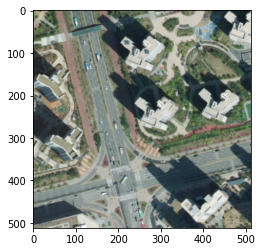

In [13]:
im1_path = os.path.join(rawtiffs_path, raw_tiffs[0])
im1 = tiff.imread(im1_path)

plt.figure()
plt.imshow(im1)

In [14]:
im1.shape

(512, 512, 3)

We can see that the image is an aerial image of a crossroad and has size 512*512 px with 3 color channels.

#### Multiple images

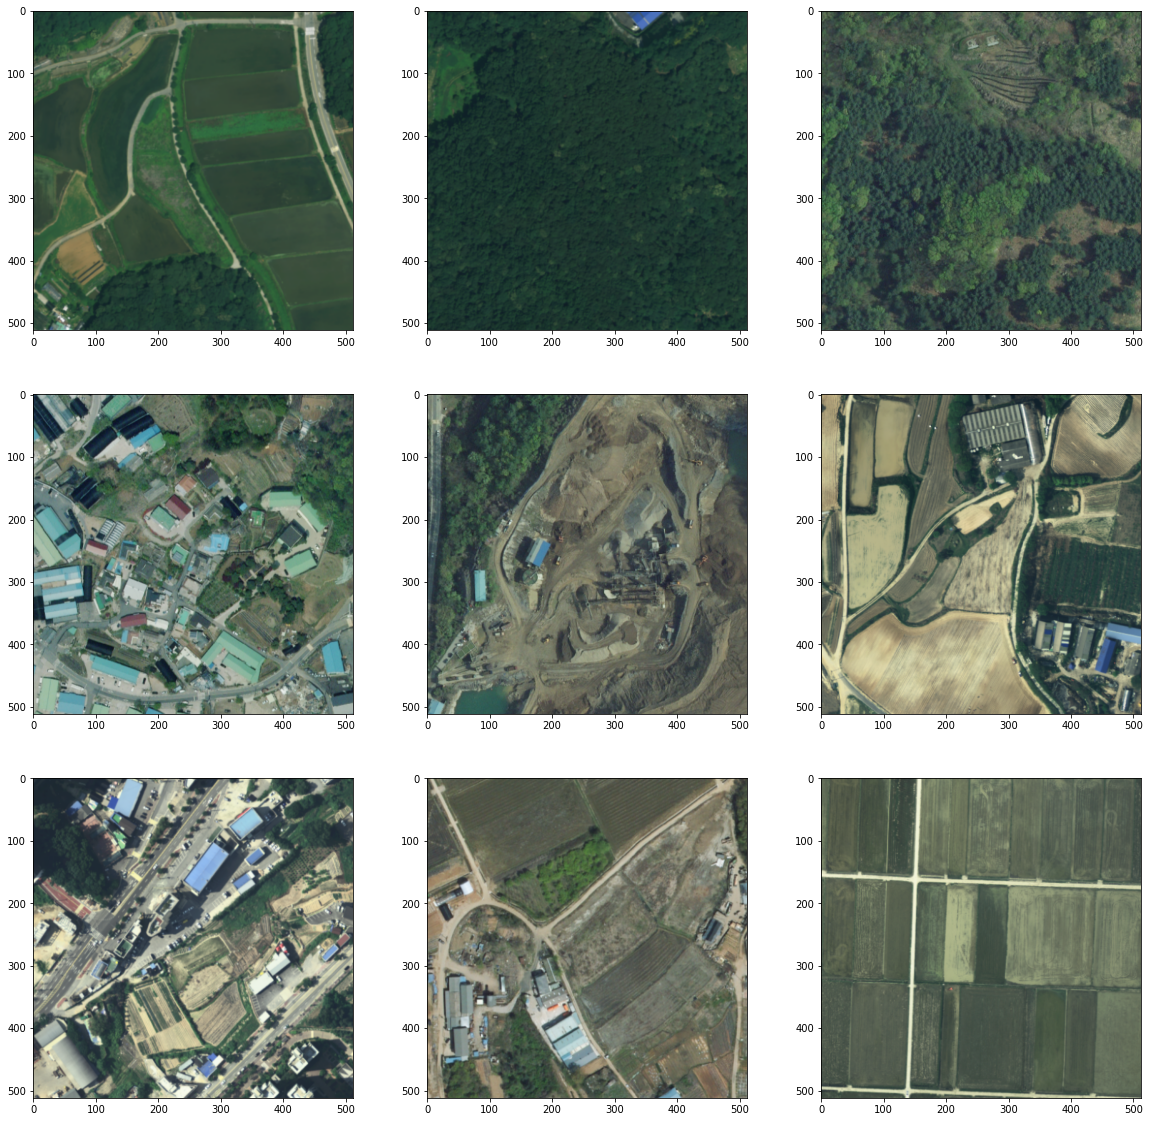

In [11]:
img_samples = random.sample(raw_tiffs, 9)

plt.figure(figsize=(20,20))
for i in range(9):
    plt.subplot(3,3,i+1)
    impath = os.path.join(rawtiffs_path, img_samples[i])
    im = tiff.imread(impath)
    plt.imshow(im)

#### Image Sizes

In [13]:
img_sizes = []

for imname in raw_tiffs:
    impath = os.path.join(rawtiffs_path, imname)
    im = tiff.imread(impath)
    img_sizes.append(im.shape)

In [14]:
set(img_sizes)

{(512, 512, 3)}

It seems that all image files have the same size: (512,512,3)

### Label files

We now move on and see what kind of information the label json files contain.

In [15]:
label1path = os.path.join(labeljsons_path, label_jsons[0])
label1 = json.load(open(label1path))

label1

{'type': 'FeatureCollection',
 'name': 'LC_AP_37607046_001_FGT',
 'crs': {'type': 'name', 'properties': {'name': 'urn:ogc:def:crs:EPSG::5186'}},
 'features': [{'type': 'Feature',
   'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[167095.6468231578, 560792.150136266],
      [167094.22999999954, 560792.150136266],
      [167094.22999999954, 560795.3082871719],
      [167095.02321734745, 560795.50801371],
      [167095.6468231578, 560792.150136266]]]}},
  {'type': 'Feature',
   'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[167175.20775271166, 560792.150136266],
      [167144.3805187422, 560792.150136266],
      [167144.3805187422, 560794.1042602079],
      [167149.44776496303, 560795.4685188083],
      [167146.14136993943, 560808.3792041454],
      [167149.21105429117, 560809.1521290217],
      [167153.8840144171, 560810.1369387897],
      [167174.05255905495, 560796.6912423607]

In [16]:
label1.keys()

dict_keys(['type', 'name', 'crs', 'features'])

Since we are making an image segmentation task, the important information isontained in 'features'.
Here is an example of the 1st feature.

In [20]:
feature1 = label1['features'][0]
feature1

{'type': 'Feature',
 'properties': {'ANN_CD': 10, 'ANN_NM': '건물'},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[167095.6468231578, 560792.150136266],
    [167094.22999999954, 560792.150136266],
    [167094.22999999954, 560795.3082871719],
    [167095.02321734745, 560795.50801371],
    [167095.6468231578, 560792.150136266]]]}}

This tells us the type of object labelled in the picture:

In [21]:
feature1['properties']['ANN_NM']

'건물'

'건물' is korean for 'building'.

The following tells us the polygon coordinates for the given feature (i.e. the building):

In [22]:
feature1['geometry']['coordinates']

[[[167095.6468231578, 560792.150136266],
  [167094.22999999954, 560792.150136266],
  [167094.22999999954, 560795.3082871719],
  [167095.02321734745, 560795.50801371],
  [167095.6468231578, 560792.150136266]]]

For images that are of size (512,512), these coordinates seem unreasonably large. We check the meta files for more information.

### META files

In [23]:
meta1_path = os.path.join(metafiles_path, meta_files[0])
meta1 = json.load(open(meta1_path))

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 269: invalid start byte

There seems to be invalid bytes in our files. We use *iconv* to fix this:
```
find -type f -exec iconv -f utf-8 -c {} -o $/path/to/output/directory/{} \;
```

In our actual project, we run the bash script *fix_utf.sh* to create fixed versions of the META files.

#### Example with 1 file

In [26]:
# New path containing the corrected meta files
metafiles_path = '/workspace/Competition/map_segmentation/data/RAW/train/meta_fixed'
meta_files = os.listdir(metafiles_path)
len(meta_files)

13520

In [27]:
meta1_path = os.path.join(metafiles_path, meta_files[0])
meta1 = json.load(open(meta1_path))

In [28]:
meta1

[{'img_id': 'LC_AP_37607046_068',
  'img_width': 512,
  'img_height': 512,
  'img_type': 'aerophoto',
  'img_coordinate': 'EPSG:5186',
  'coordinates': '168465.365000002, 559877.975136267',
  'img_resolution': 0.51,
  'img_time': 2018,
  'img_provided': '',
  'ann_id': 'LC_AP_37607046_068_FGT',
  'ann_type': 'polygon',
  'ann_file_type': 'tif',
  'provided_nm': 'ѱȸ'}]

Because there was no explanation about each of the data files in the raw dataset, a lot of trial and error was required. Of the information provided in the meta files, 'img_coordinate' and 'coordinates' are the most important.